In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
au_df = pd.read_csv('/content/Au_nanoparticle_dataset.csv')

In [12]:
print(au_df.shape)

(4000, 185)


In [13]:
au_df.head()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [14]:
for i in range(au_df.shape[0]):
    n_sum = (au_df['N_bulk'][i] + au_df['N_surface'][i])
    assert n_sum == au_df['N_total'][i]
    if (au_df.shape[0]-1) == i:
        print('all N_bulk and N_surface add up to N_total')

all N_bulk and N_surface add up to N_total


In [15]:
au_df[['N_total', 'N_bulk', 'N_surface', 'R_avg']].describe()

,N_total,N_bulk,N_surface,R_avg
count,4000.000000,4000.000000,4000.00000,4000.000000
mean,3476.786500,2521.550250,955.23625,20.654363
std,3679.286769,2976.232459,721.87022,7.610716
min,236.000000,89.000000,137.00000,8.528600
25%,1061.000000,618.750000,437.00000,15.160725
50%,1867.000000,1199.000000,666.00000,18.629250
75%,4503.000000,3183.000000,1301.75000,25.525125
max,14277.000000,11580.000000,3190.00000,39.239200


In [16]:
au_df[['N_total', 'N_bulk', 'N_surface', 'R_avg']].head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [18]:
selected_columns = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
# Calculate the mean for each column
mean_values = au_df[selected_columns].mean()
mean_values

N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64

In [20]:
# Calculate the standard deviation for each column
std_values = au_df[selected_columns].std()
std_values

N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64

In [21]:
# Calculate the quartiles for each column (25th, 50th, and 75th percentiles)
quartile_values = au_df[selected_columns].quantile([0.25, 0.5, 0.75])
quartile_values

,N_total,N_bulk,N_surface,R_avg
0.25,1061.0,618.75,437.00,15.160725
0.50,1867.0,1199.00,666.00,18.629250
0.75,4503.0,3183.00,1301.75,25.525125


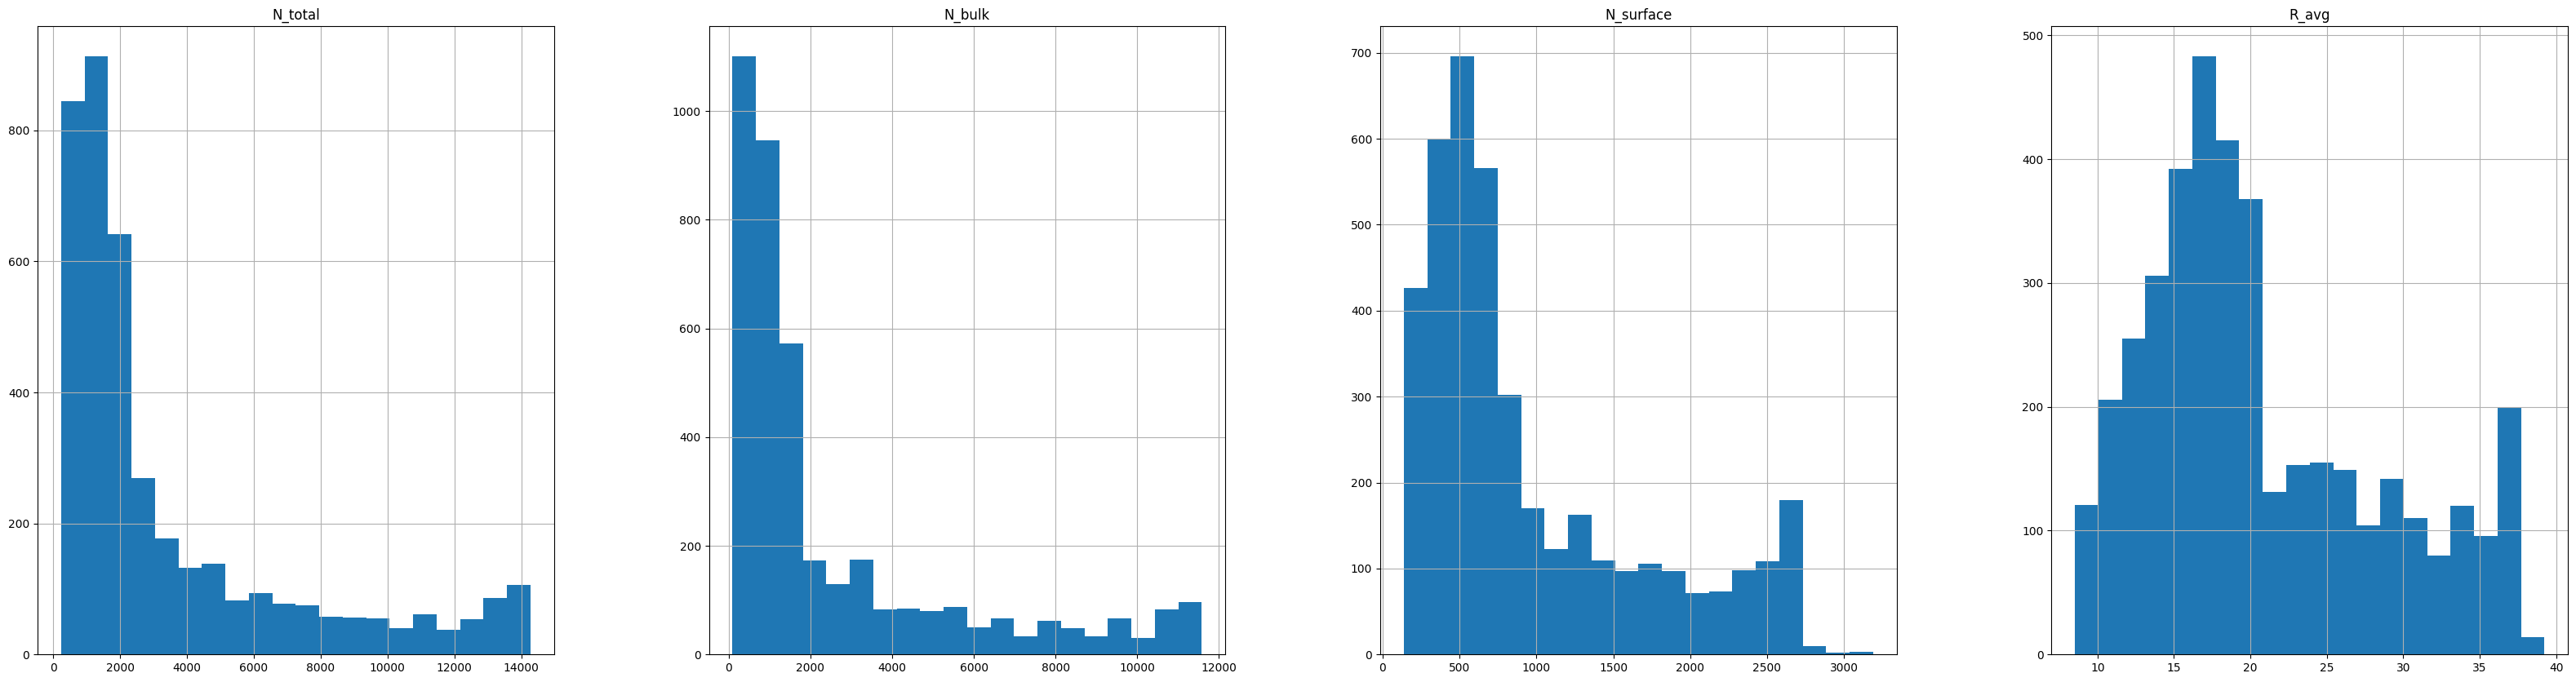

In [22]:
au_df.loc[:,['N_total', 'N_bulk', 'N_surface', 'R_avg']].hist(layout=(1,4), bins =20, figsize=(40, 10))
plt.show()

In [23]:
import seaborn as sns

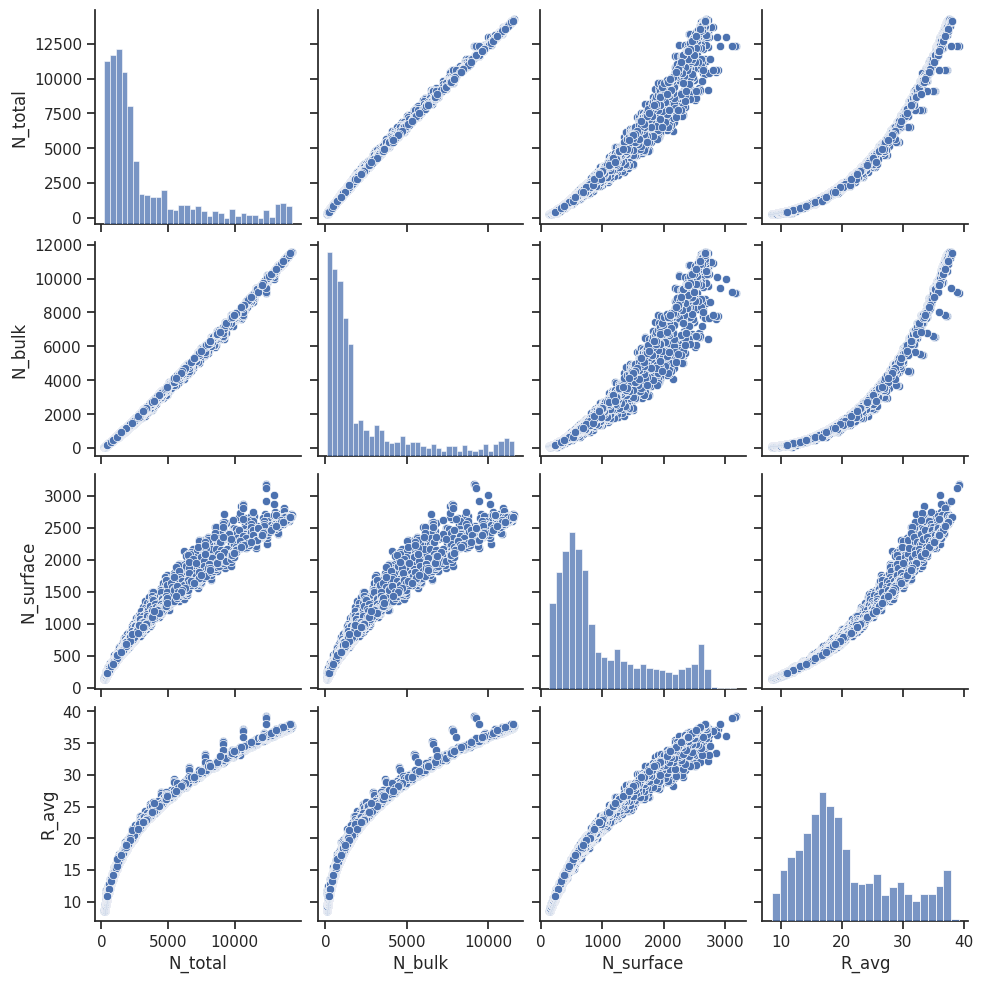

In [24]:
# Create a pairplot
sns.set(style="ticks")
sns.pairplot(au_df[selected_columns])
plt.show()

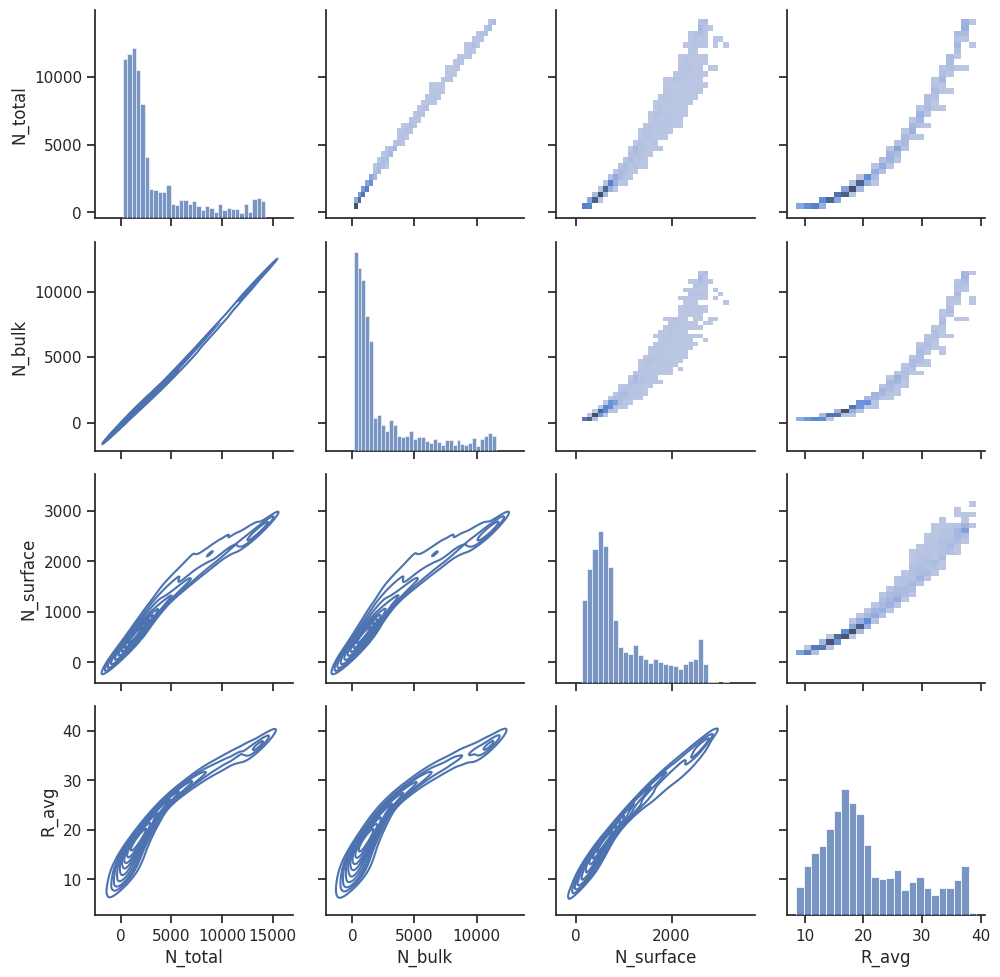

In [26]:
#new_df is the dataframe containing only the above mentioned 4 features.
g = sns.PairGrid(au_df[selected_columns])
g.map_upper(sns.histplot) #bivariate histogram
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

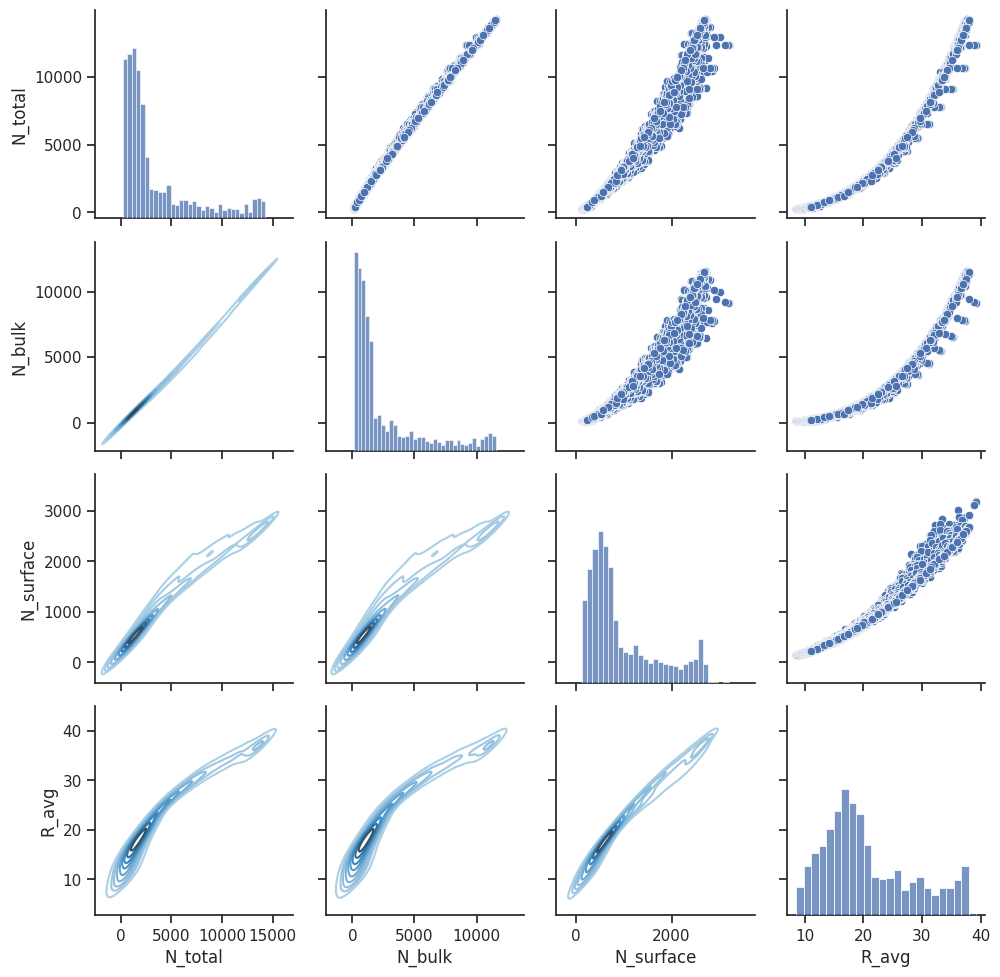

In [27]:
# Create a pairplot with histograms on the diagonal and bivariate KDE plots on the lower half
sns.set(style="ticks")
g = sns.PairGrid(au_df[selected_columns])
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.map_lower(sns.kdeplot, cmap='Blues_d')
plt.show()